# Fortune Movie Productions

## Stakeholders: CEO, Head of Movie Operations

# Business Problem:

Fortune Movie Productions have decided to make their First Movie studio, and exploring what types of films are currently best at Box Office. We want to evaluate which movies are faster reach to the Audience, what type of movies makes best revenue, and who are the best directors for each genre etc. Our stakeholder can choose the right option for their first movie production based on our analysis.



### The Data

In the folder `zippedData` are movie datasets from:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

Because it was collected from various locations, the different files have different formats. Some are compressed CSV (comma-separated values) or TSV (tab-separated values) files that can be opened using spreadsheet software or `pd.read_csv`, while the data from IMDB is located in a SQLite database.

![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/main/movie_data_erd.jpeg)

Note that the above diagram shows ONLY the IMDB data. You will need to look carefully at the features to figure out how the IMDB data relates to the other provided data files.

It is up to you to decide what data from this to use and how to use it. If you want to make this more challenging, you can scrape websites or make API calls to get additional data. If you are feeling overwhelmed or behind, we recommend you use only the following data files:

* `im.db.zip`
  * Zipped SQLite database (you will need to unzip then query using SQLite)
  * `movie_basics` and `movie_ratings` tables are most relevant
* `bom.movie_gross.csv.gz`
  * Compressed CSV file (you can open without expanding the file using `pd.read_csv`)

In [3]:
# Importing all Libraries

import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Exploration:

Loading each dataset, exploring with info() and value_counts() function to check the data.

In [14]:
# Load Dataset 1 from bom.movie_gross.csv and checking info about the database
movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv/bom.movie_gross.csv")
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
# Viewing datatype, missing values using info()
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Dataframe movie_gross has columns Movie title, Studio, Domestic gross revenue, foreign gross revenue, movie_year. Checking columns title, studio, domestic_gross, year using value_count to check unique values for these columns. Checking missing values info using isna().sum()

In [4]:
# Checking columns using value_count to check unique values, no missing values
movie_gross['studio'].value_counts()
movie_gross['domestic_gross'].value_counts()
movie_gross['foreign_gross'].value_counts()
movie_gross['year'].value_counts()

year
2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: count, dtype: int64

In [5]:
# Missing values in all columns for Movie_gross dataframe
print('Domestic_gross missing values:', movie_gross['domestic_gross'].isna().sum())
print('foreign_gross missing values:', movie_gross['foreign_gross'].isna().sum())
print('Year missing values:', movie_gross['year'].isna().sum())
print('Studio missing values:', movie_gross['studio'].isna().sum())
print('Title missing values:', movie_gross['title'].isna().sum())

Domestic_gross missing values: 28
foreign_gross missing values: 1350
Year missing values: 0
Studio missing values: 5
Title missing values: 0


In [6]:
# Exploring Dataset 2 Rotten Tomatoes data, loading rt.movie_info.tsv
rt_movie = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t', encoding = 'windows-1252')
rt_movie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [7]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [8]:
# Loading Dataset 3 rt_reviews.tsv
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', encoding = 'windows-1252')
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [9]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [10]:
rt_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

Dataset tmdb_movies has columns genre_ids, original_title, popularity, release_date, vote_average, vote_count. Column genre_id needs
cleaning, changing columns with object datatype to lowercase, removing column Unnamed which is not needed. 

In [15]:
# Loading Dataset4 tmdb.movies.csv
tmdb_movies = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [12]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [13]:
tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [16]:
# Loading Dataset5 tn.movie_budgets.csv
tn_moviesbudget = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn_moviesbudget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [15]:
tn_moviesbudget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [16]:
tn_moviesbudget['production_budget'].value_counts()
tn_moviesbudget['domestic_gross'].value_counts()
tn_moviesbudget['worldwide_gross'].value_counts()

worldwide_gross
$0             367
$8,000,000       9
$2,000,000       6
$7,000,000       6
$4,000,000       4
              ... 
$39,498,360      1
$94,875,000      1
$77,593,167      1
$36,299,670      1
$181,041         1
Name: count, Length: 5356, dtype: int64

In [17]:
tn_moviesbudget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Dataset tn_movie_budgets.csv & tmdb_movies.csv are cleaned datasets without missing values. tn_moviesbudget has columns useful to find the revenue history of the movies, tmdb_movies are useful to find the popular genre, best vote count and vote average. Genre in tmdb_movies are in list datatype, this has to changed to category for analysis purpose.

Exploring Dataset 6 Sqlite Database im.db. Database has 8 tables: directors, movie_akas, movie_ratings, principals, known_for, movie_basics,
persons and writers. Tables movie_akas, movie_ratings, movie_basics has more columns which needs to be joined with smaller tables directors,
principals, writers, persons and known_for for analysis.

In [6]:
# Loading im.db dataset using sqlite, and exploring the data 
imdb = sqlite3.connect("zippedData/im.db")
#!unzip zippedData/im.db.zip -d zippedData/

In [21]:
%%bash
sqlite3 zippedData/im.db
.schema 

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

Table movie_akas has columns movie_id, title, language and types(studio type), filtered table for language English "en" . This table
can be joined with other tables for meaning sorted table, which helps to create visualization and further analysis.

In [7]:
# Tabe movie_akas columns, chose language English
pd.read_sql("""SELECT * FROM movie_akas """, imdb)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [8]:
# Table movie_ratings, and looking at max value for averagerating & numvotes using ORDER BY
pd.read_sql("""SELECT * FROM movie_ratings  """, imdb)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [9]:
pd.read_sql("""SELECT * FROM directors""", imdb)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [235]:
 pd.read_sql("""SELECT * FROM movie_basics """, imdb)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [10]:
pd.read_sql("""SELECT * FROM persons  """, imdb)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [128]:
pd.read_sql("""SELECT * FROM known_for""", imdb)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [11]:
pd.read_sql("""SELECT * FROM writers""", imdb)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [12]:
pd.read_sql("""SELECT * FROM principals""", imdb)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


Explored other tables: directors, known_for, persons and writers. These tables may be used to join with movie_akas/movie_rating/movie_basics 
for better understanding and visualization. 

## Data Cleaning:

Starting with tmdb_movies dataset, has columns Unnamed which may be similar to index column, deleting Unnamed. Column genre_ids can be used to find trending genre which has more vote_count. Cleaning genre_ids from object to category genre names. Changing lower case for columns which has objects datatype, adding release_year for release_date column if needed later.

In [23]:
tmdb_movies.head()
# Create copy of original data for column dropping
tmdb_movies1 = tmdb_movies.copy() 

Now it's time to make some greater adjustments to the dataset which may involve creating copies of the original dataset in order to be able to easily go back if any mistakes or adjustments need to be addressed.

In [24]:
# Dropping column Unnamed
tmdb_movies1.drop(['Unnamed: 0'], axis=1, inplace=True)
tmdb_movies1.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [25]:
# Changing to lowercase for columns original_title, title
def lowercase(df):
    df = df.apply(lambda x: x.lower())
    return df

tmdb_movies1['original_title'] = lowercase(tmdb_movies1['original_title'])
tmdb_movies1['title'] = lowercase(tmdb_movies1['title'])

tmdb_movies1.head()

    

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,harry potter and the deathly hallows: part 1,33.533,2010-11-19,harry potter and the deathly hallows: part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,how to train your dragon,28.734,2010-03-26,how to train your dragon,7.7,7610
2,"[12, 28, 878]",10138,en,iron man 2,28.515,2010-05-07,iron man 2,6.8,12368
3,"[16, 35, 10751]",862,en,toy story,28.005,1995-11-22,toy story,7.9,10174
4,"[28, 878, 12]",27205,en,inception,27.920,2010-07-16,inception,8.3,22186


In [26]:
# Adding new release_day from column release_date & finding which day impacts more ticket sales for new release
tmdb_movies1['release_date'] = pd.to_datetime(tmdb_movies1['release_date'])
# Extract the day
tmdb_movies1['release_day'] = tmdb_movies1['release_date'].dt.strftime('%A')

tmdb_movies1.head()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_day
0,"[12, 14, 10751]",12444,en,harry potter and the deathly hallows: part 1,33.533,2010-11-19,harry potter and the deathly hallows: part 1,7.7,10788,Friday
1,"[14, 12, 16, 10751]",10191,en,how to train your dragon,28.734,2010-03-26,how to train your dragon,7.7,7610,Friday
2,"[12, 28, 878]",10138,en,iron man 2,28.515,2010-05-07,iron man 2,6.8,12368,Friday
3,"[16, 35, 10751]",862,en,toy story,28.005,1995-11-22,toy story,7.9,10174,Wednesday
4,"[28, 878, 12]",27205,en,inception,27.920,2010-07-16,inception,8.3,22186,Friday


In [27]:
# Cleaning column genre_id to genre_names
# Removing [] from genre_ids
tmdb_movies1['genre_ids'] = tmdb_movies1['genre_ids'].apply(lambda x: x.strip('[]').strip(""))

# Creating column genre_list with the first value from genre_ids
tmdb_movies1['genre_list']= tmdb_movies1['genre_ids'].apply(lambda x: x.split(',')[0])

# Creating a dictionary for genre names and replacing genre_id with genre_names, 
# I googled info from tmdb website source
# https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee

common_genrelist = {'action':'28', 'adventure':'12', 'animation':'16', 'comedy':'35', 'crime':'80', 'documentary':'99',
                 'drama':'18', 'family':'10751', 'fantasy':'14', 'history':'36', 'horror':'27', 'music':'10402',
                 'mystery':'9648', 'romance':'10749', 'scfiction':'878','tvmovie': '10770', 'thriller':'53', 
                 'war':'10752', 'western':'37'}

# Iterate over genre_ids column to replace with genre_name based on dictionary common_genrelist
for k,v in common_genrelist.items():
    tmdb_movies1.loc[tmdb_movies1['genre_list'].str.contains(v), 'genre_list'] = k

tmdb_movies1.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_day,genre_list
0,"12, 14, 10751",12444,en,harry potter and the deathly hallows: part 1,33.533,2010-11-19,harry potter and the deathly hallows: part 1,7.7,10788,Friday,adventure
1,"14, 12, 16, 10751",10191,en,how to train your dragon,28.734,2010-03-26,how to train your dragon,7.7,7610,Friday,fantasy
2,"12, 28, 878",10138,en,iron man 2,28.515,2010-05-07,iron man 2,6.8,12368,Friday,adventure
3,"16, 35, 10751",862,en,toy story,28.005,1995-11-22,toy story,7.9,10174,Wednesday,animation
4,"28, 878, 12",27205,en,inception,27.920,2010-07-16,inception,8.3,22186,Friday,action
5,"12, 14, 10751",32657,en,percy jackson & the olympians: the lightning t...,26.691,2010-02-11,percy jackson & the olympians: the lightning t...,6.1,4229,Thursday,adventure
6,"28, 12, 14, 878",19995,en,avatar,26.526,2009-12-18,avatar,7.4,18676,Friday,action
7,"16, 10751, 35",10193,en,toy story 3,24.445,2010-06-17,toy story 3,7.7,8340,Thursday,animation
8,"16, 10751, 35",20352,en,despicable me,23.673,2010-07-09,despicable me,7.2,10057,Friday,animation
9,"16, 28, 35, 10751, 878",38055,en,megamind,22.855,2010-11-04,megamind,6.8,3635,Thursday,animation


In [28]:
# Removing 0 and blank spaces
tmdb_movies1.replace(0, np.nan, inplace = True)
tmdb_movies1 = tmdb_movies1.map(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)
tmdb_movies1.dropna(inplace=True)
tmdb_movies1.head()
tmdb_movies1['genre_list'].value_counts()

genre_list
drama          4900
documentary    4379
comedy         3620
horror         2198
action         1644
thriller       1518
animation       911
romance         692
music           677
scfiction       570
adventure       544
crime           538
family          456
tvmovie         364
fantasy         314
mystery         287
history         126
war             103
western          81
Name: count, dtype: int64

Cleaning tn_moviebudgets dataset. Columns production_budget, domestic_gross, worldwide_gross are objects, changing to
integer and removing $ signs and commas

In [29]:
# Creating a copy before cleaning tn_moviesbudget
tn_moviesbudget1 = tn_moviesbudget.copy()

# Calling function to remove $ amd commas for columns production_budget, domestic_gross & worldwide_gross
def convert_integer(string):
    return int(string.replace('$','').replace(',',''))

tn_moviesbudget1['production_budget'] = tn_moviesbudget1['production_budget'].apply(convert_integer)
tn_moviesbudget1['domestic_gross'] = tn_moviesbudget1['domestic_gross'].apply(convert_integer)
tn_moviesbudget1['worldwide_gross'] = tn_moviesbudget1['worldwide_gross'].apply(convert_integer)
tn_moviesbudget1.head(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


In [30]:
# Keeping Columns production_budget, domestic_gross, worldwide_gross in millions
def change_to_millions(x):
    return x/1000000
tn_moviesbudget1['production_budget_million'] = tn_moviesbudget1['production_budget'].apply(change_to_millions)
tn_moviesbudget1['domestic_gross_million'] = tn_moviesbudget1['domestic_gross'].apply(change_to_millions)
tn_moviesbudget1['wordlwide_gross_million'] = tn_moviesbudget1['worldwide_gross'].apply(change_to_millions)
tn_moviesbudget1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_million,domestic_gross_million,wordlwide_gross_million
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,425.0,760.507625,2776.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,410.6,241.063875,1045.663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,350.0,42.762350,149.762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,330.6,459.005868,1403.013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,317.0,620.181382,1316.721747


In [31]:
tn_moviesbudget1.describe()

,id,production_budget,domestic_gross,worldwide_gross,production_budget_million,domestic_gross_million,wordlwide_gross_million
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,31.587757,41.873327,91.487461
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,41.812077,68.240597,174.719969
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.001100,0.000000,0.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,5.000000,1.429535,4.125415
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,17.000000,17.225945,27.984448
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,40.000000,52.348661,97.645837
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,425.000000,936.662225,2776.345279


In [32]:
# Dropping rows which has 0 domestic_gross and 0 worldwide_gross
index_drop = tn_moviesbudget1[tn_moviesbudget1['domestic_gross_million']==0].index
tn_moviesbudget1.drop(index_drop, inplace=True)

index_drop2 = tn_moviesbudget1[tn_moviesbudget1['worldwide_gross']==0].index
tn_moviesbudget1.drop(index_drop2, inplace=True)
tn_moviesbudget1.describe()

,id,production_budget,domestic_gross,worldwide_gross,production_budget_million,domestic_gross_million,wordlwide_gross_million
count,5234.000000,5.234000e+03,5.234000e+03,5.234000e+03,5234.000000,5234.000000,5234.000000
mean,50.346580,3.403348e+07,4.625747e+07,1.007615e+08,34.033480,46.257466,100.761506
std,28.848667,4.296048e+07,7.029651e+07,1.811226e+08,42.960481,70.296510,181.122645
min,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,0.001100,0.000388,0.000401
25%,25.000000,6.500000e+06,4.289718e+06,8.142571e+06,6.500000,4.289719,8.142571
50%,50.000000,2.000000e+07,2.198422e+07,3.543844e+07,20.000000,21.984223,35.438436
75%,75.000000,4.500000e+07,5.756598e+07,1.093357e+08,45.000000,57.565980,109.335661
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,425.000000,936.662225,2776.345279


Cleaning Box office movie dataset (movie_gross), changing columns with object datatype to lower case.

In [33]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [34]:
# Removing missing values 0 and blank spaces
movie_gross.replace(0, np.nan, inplace = True)
movie_gross = movie_gross.map(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)
movie_gross.dropna(inplace=True)

# Changing columns title & studio as lower case, using above functions lowercase & change_to_millions
# Leaving foreign_gross as is, since it has more missing values
movie_gross['title'] = lowercase(movie_gross['title'])
movie_gross['studio'] = lowercase(movie_gross['studio']) 

movie_gross['domestic_gross_millions'] = movie_gross['domestic_gross'].astype(int)
movie_gross['domestic_gross_millions'] = movie_gross['domestic_gross'].apply(change_to_millions)
movie_gross.to_csv("C:/Users/uyamu/Documents/Phase2/boxoffice_gross.csv")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_millions
0,toy story 3,bv,415000000.0,652000000,2010,415.0
1,alice in wonderland (2010),bv,334200000.0,691300000,2010,334.2
2,harry potter and the deathly hallows part 1,wb,296000000.0,664300000,2010,296.0
3,inception,wb,292600000.0,535700000,2010,292.6
4,shrek forever after,p/dw,238700000.0,513900000,2010,238.7


# Statistical Exploration, Visualization & Analysis

Dataset tmdb_movies1 was cleaned, trying to make a connection between genres and popularity based on mean vote_counts and mean vote_average. This process helps to filter rows which has top vote_average but with lesser vote_counts. Creating subset with filtered dataset to visualize.

In [35]:
# Checking mean for tmdb_movies1
tmdb_movies1.describe()

,id,popularity,release_date,vote_average,vote_count
count,23922.000000,23922.000000,23922,23922.000000,23922.000000
mean,292033.715785,3.385836,2014-06-27 02:29:35.169300224,6.013226,215.077293
min,27.000000,0.600000,1930-04-29 00:00:00,0.500000,1.000000
25%,147703.250000,0.637000,2012-07-19 00:00:00,5.000000,2.000000
50%,306628.000000,1.504000,2014-10-11 00:00:00,6.000000,7.000000
75%,419399.500000,4.448000,2016-10-21 00:00:00,7.000000,35.000000
max,608079.000000,80.773000,2019-05-17 00:00:00,10.000000,22186.000000
std,155419.111875,4.509308,NaN,1.735668,1009.544140


Above statistics helps to concentrate vote_counts 6 and above, vote_average 214 and above. Creating subset of tmdb_movies1 which has 
vote_average > 6 and vote_count > 214.

In [36]:
tmdb_movies1_subset = tmdb_movies1[(tmdb_movies1['vote_average'] > 6) & (tmdb_movies1['vote_count'] > 214)]
tmdb_movies1_subset.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_day,genre_list
0,"12, 14, 10751",12444,en,harry potter and the deathly hallows: part 1,33.533,2010-11-19,harry potter and the deathly hallows: part 1,7.7,10788,Friday,adventure
1,"14, 12, 16, 10751",10191,en,how to train your dragon,28.734,2010-03-26,how to train your dragon,7.7,7610,Friday,fantasy
2,"12, 28, 878",10138,en,iron man 2,28.515,2010-05-07,iron man 2,6.8,12368,Friday,adventure
3,"16, 35, 10751",862,en,toy story,28.005,1995-11-22,toy story,7.9,10174,Wednesday,animation
4,"28, 878, 12",27205,en,inception,27.920,2010-07-16,inception,8.3,22186,Friday,action
5,"12, 14, 10751",32657,en,percy jackson & the olympians: the lightning t...,26.691,2010-02-11,percy jackson & the olympians: the lightning t...,6.1,4229,Thursday,adventure
6,"28, 12, 14, 878",19995,en,avatar,26.526,2009-12-18,avatar,7.4,18676,Friday,action
7,"16, 10751, 35",10193,en,toy story 3,24.445,2010-06-17,toy story 3,7.7,8340,Thursday,animation
8,"16, 10751, 35",20352,en,despicable me,23.673,2010-07-09,despicable me,7.2,10057,Friday,animation
9,"16, 28, 35, 10751, 878",38055,en,megamind,22.855,2010-11-04,megamind,6.8,3635,Thursday,animation


Visualize between Genre and Vote_average/Vote_counts

In [37]:
tmdb_movies1_subset.to_csv("C:/Users/uyamu/Documents/Phase2/tmdbmovie_subset.csv")


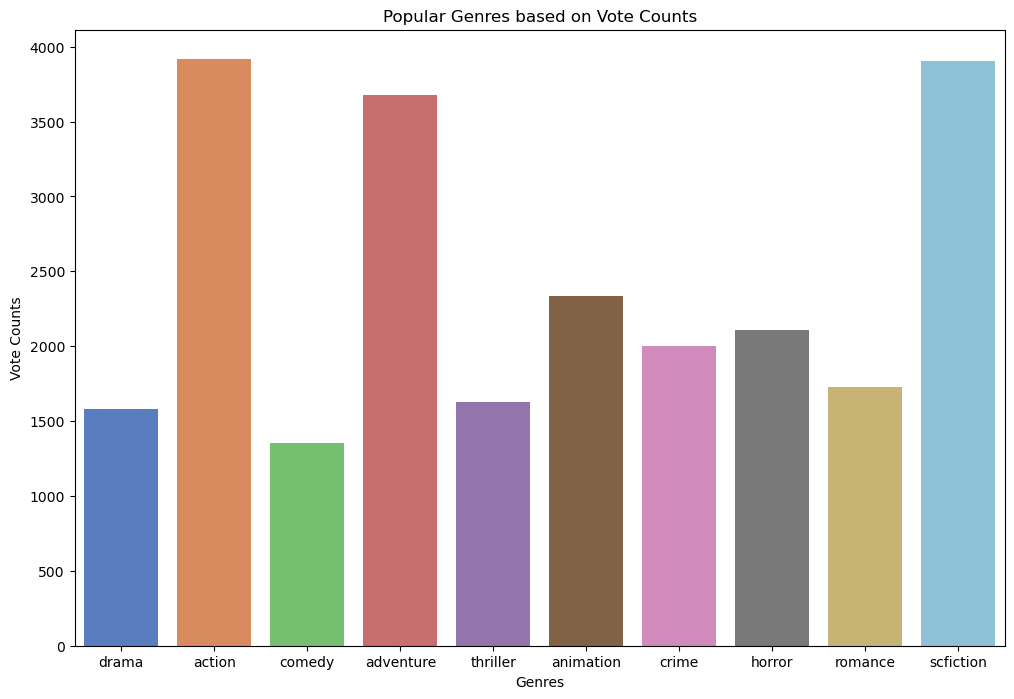

In [38]:
# Visualize Genre vs vote_average,vote_count
genre = tmdb_movies1_subset['genre_list'].value_counts().nlargest(10).index

plt.figure(figsize = (12,8))
sns.barplot(x='genre_list', y ='vote_count', data=tmdb_movies1_subset, order = genre, palette='muted', ci= None)

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Vote Counts')
#plt.ylim(ymin=6, ymax=8)
plt.title('Popular Genres based on Vote Counts')

# Show the plot
plt.show()

Above visualization for popular genres based on vote_count. Looks like genres: science fiction, action, adventure and animation 
are our top 4 categories. Analyzing top 4 genre categories with vote_average.

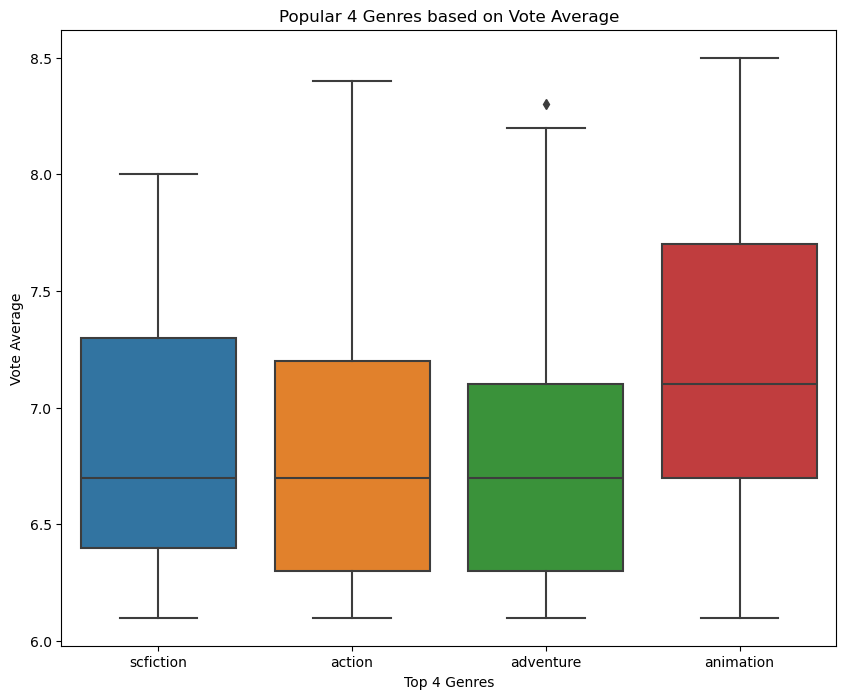

In [39]:
# Visualization for top 4 genre categories versus vote_average

genre = ['scfiction', 'action', 'adventure', 'animation']

subset_df = tmdb_movies1_subset[tmdb_movies1_subset['genre_list'].isin(genre)]

fig,ax = plt.subplots(figsize = (10,8))
sns.boxplot(x= 'genre_list', y = 'vote_average', order = genre, data=subset_df, ax=ax)

# Add labels and title
plt.xlabel('Top 4 Genres')
plt.ylabel('Vote Average')

plt.title('Popular 4 Genres based on Vote Average')

# Show the plot
plt.show()

Above Boxplot visualization shows Animation and ScienceFiction has best voting average than other 2 categories.

Exploring im.db database for visualization. Table movie_ratings has mean numvotes as 3523 and mean averagerating as 6.33. Filtering movie_ratings with mean numvotes and averagerating and joining table principals & table persons for famous movie principals with best votes. Visualizing Principals
versus Total numvotes for each principal.


In [42]:
# Sql query with numvotes>3523 and averagerating>6, finding total numvotes for each principal
df_principals = pd.read_sql("""SELECT SUM(numvotes) as totalvotes, averagerating, person_id, primary_name, category FROM movie_ratings
               JOIN principals USING(movie_id)
               JOIN persons USING(person_id)
               WHERE numvotes>3500 AND averagerating>6 GROUP BY person_id ORDER BY totalvotes DESC""", imdb)
df_principals

,totalvotes,averagerating,person_id,primary_name,category
0,7277659,7.0,nm0498278,Stan Lee,writer
1,6538818,7.0,nm0456158,Jack Kirby,writer
2,6443161,8.0,nm0000138,Leonardo DiCaprio,actor
3,6355537,7.0,nm0000375,Robert Downey Jr.,actor
4,5642037,8.4,nm0634240,Christopher Nolan,director
...,...,...,...,...,...
18925,3504,6.2,nm2098201,Fernanda De la Peza,producer
18926,3504,7.2,nm1908787,Mikko Myllylahti,writer
18927,3504,7.2,nm1780668,Jussi Rantamäki,producer
18928,3504,6.2,nm1673285,Martín Escalante,composer


<function matplotlib.pyplot.show(close=None, block=None)>

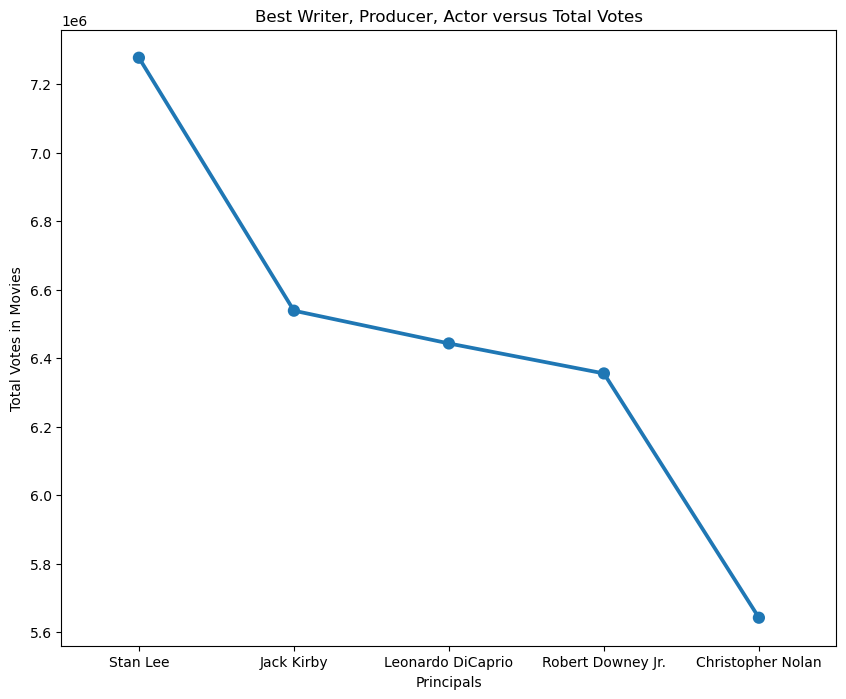

In [43]:
# visualize top 5 principals
principal_subset = df_principals.head()

fig, ax = plt.subplots(figsize = (10,8))
sns.pointplot(data=principal_subset, x= 'primary_name' , y="totalvotes")

# title, labels
plt.title('Best Writer, Producer, Actor versus Total Votes')
plt.ylabel('Total Votes in Movies')
plt.xlabel('Principals')
plt.show

Above Visualization shows top 5 principals who are Best writer, director or actors. Best writer Stan Lee known for Marvel movies, Best writer Jack Kirby for Captain America, Best Actor & producer Leonardo Dicaprio for Titanic Inception..., Best Actor Robert Downey Jr and Best director Christopher Nolan for Batman movie. Scify, action, adventure and animation are the top genres.

Next, focussing on Production budget risks. How this number depends on Gross revenue domestically and worldwide.
Dataset tn_moviesbudget can be used to visualize budget versus gross revenue.

<function matplotlib.pyplot.show(close=None, block=None)>

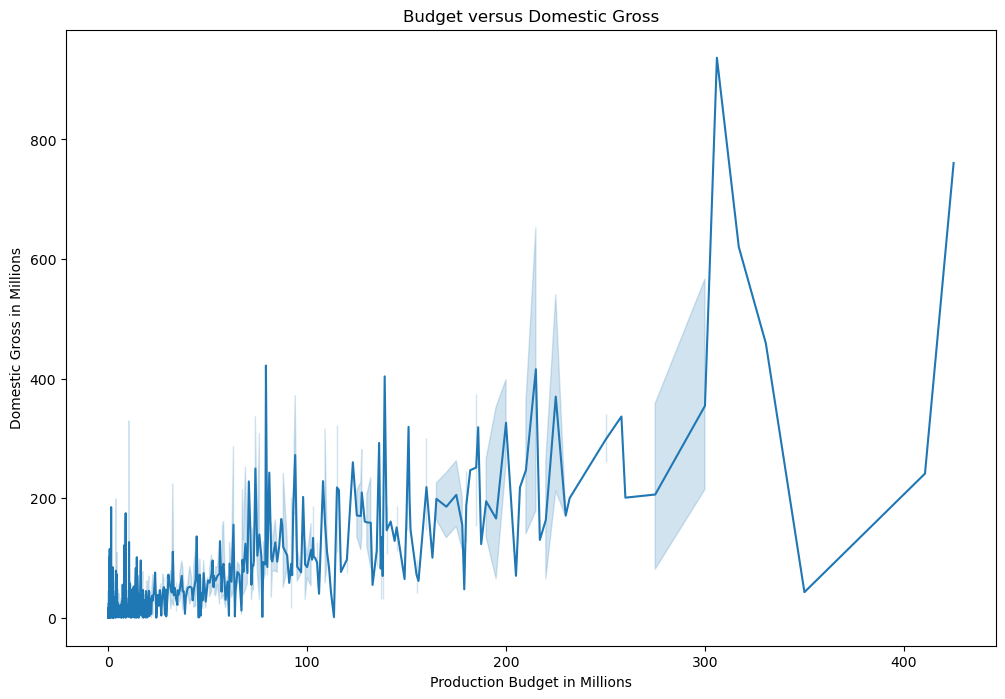

In [45]:
# Visualize budget vs domestic gross
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(data=tn_moviesbudget1, x="production_budget_million", y="domestic_gross_million")

# Title, labels
plt.title('Budget versus Domestic Gross')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Domestic Gross in Millions')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

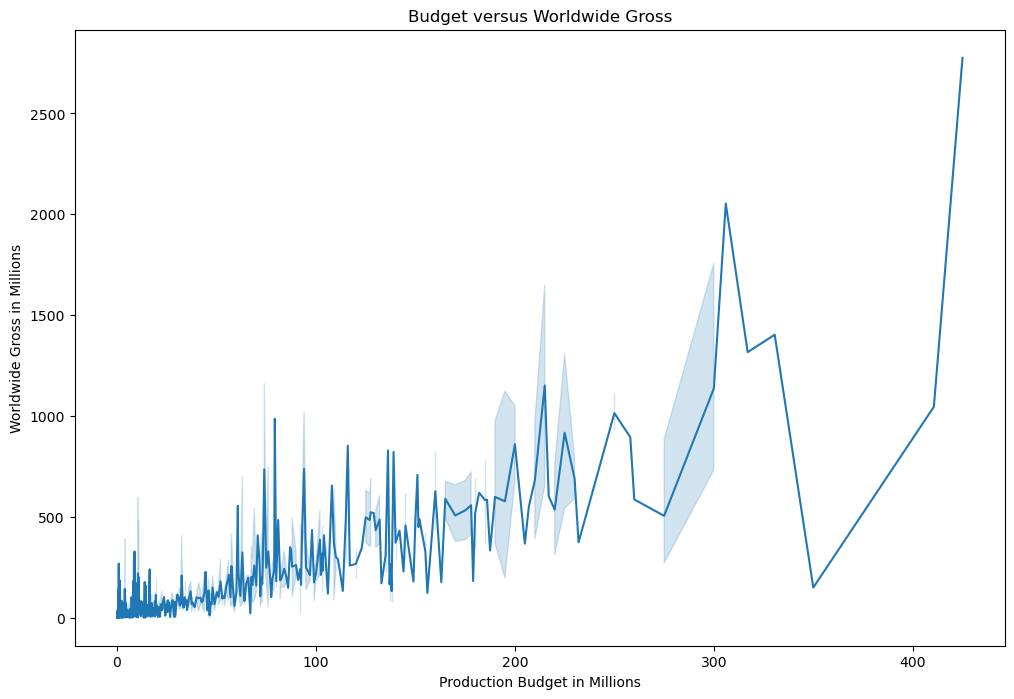

In [46]:
# Visualize budget vs worldwide gross
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(data=tn_moviesbudget1, x="production_budget_million", y="wordlwide_gross_million")

# Title, labels
plt.title('Budget versus Worldwide Gross')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Gross in Millions')
plt.show

In [ ]:
Above lineplots clearly states that budget more than 200 million carries greater risk, choosing budget 200 million and lesser 
would be recommended.

# Genre Vs Gross Revenue
Using SQL database table movie_basics, and merging with dataset tn_moviesbudget to have columns genre and gross avenue together.
Merging the data using movie title as primary key. Visualizing which genre makes best revenue.


In [47]:
# Sql query to list movie_basics table and save in pandas dataframe
df_moviebasics = pd.read_sql("""SELECT * FROM movie_basics""", imdb)
df_moviebasics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [48]:
#dropping runtime_minutes which wasn't needed
df_moviebasics.drop(['runtime_minutes'], axis=1, inplace=True)

#Sorting movie title
df_moviebasics.sort_values('primary_title',inplace = True)


In [49]:
# Merging Dataframe tn_moviesbudget and df_movie_basics
tn_movies_moviebasics = pd.merge(tn_moviesbudget1, df_moviebasics, how = 'inner', left_on='movie', right_on = 'primary_title')
tn_movies_moviebasics

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_million,domestic_gross_million,wordlwide_gross_million,movie_id,primary_title,original_title,start_year,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,425.000,760.507625,2776.345279,tt1775309,Avatar,Abatâ,2011,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,410.600,241.063875,1045.663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,350.000,42.762350,149.762350,tt6565702,Dark Phoenix,Dark Phoenix,2019,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,330.600,459.005868,1403.013963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,300.000,678.815482,2048.134200,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,67,"Apr 28, 2006",Clean,10000,138711,138711,0.010,0.138711,0.138711,tt6619196,Clean,Clean,2017,"Comedy,Drama,Horror"
3273,68,"Jul 6, 2001",Cure,10000,94596,94596,0.010,0.094596,0.094596,tt5936960,Cure,Cure,2014,None
3274,68,"Jul 6, 2001",Cure,10000,94596,94596,0.010,0.094596,0.094596,tt1872026,Cure,Cure,2011,Drama
3275,70,"Apr 1, 1996",Bang,10000,527,527,0.010,0.000527,0.000527,tt6616538,Bang,Bang,2015,None


In [50]:
# Creating a list and adding all genres from tn_movies_moviebasics, and finding unique_genres

genreslist = tn_movies_moviebasics['genres'].str.split(",")
unique_genrelist = list(set([genre for sublist in genreslist if sublist is not None for genre in sublist]))
unique_genrelist

# removing genre 'News' and 'History' which has no data.
unique_genrelist1 = [genre for genre in unique_genrelist if genre not in ['News', 'History']]
unique_genrelist1

['Drama',
 'Music',
 'Family',
 'Thriller',
 'Sci-Fi',
 'Documentary',
 'Biography',
 'Action',
 'Animation',
 'Crime',
 'Musical',
 'Mystery',
 'Western',
 'Sport',
 'War',
 'Fantasy',
 'Comedy',
 'Adventure',
 'Romance',
 'Horror']

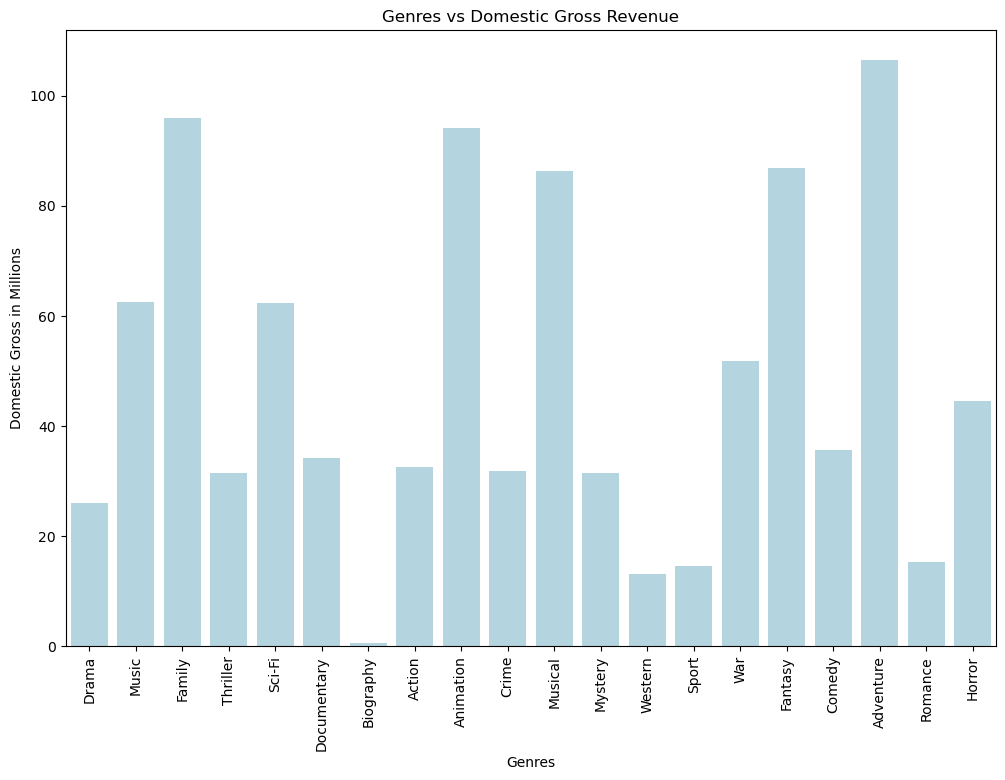

In [51]:
# Visualize Genre vs domestic_gross

plt.subplots(figsize = (12,8))
sns.barplot(x = 'genres', y ='domestic_gross_million', data=tn_movies_moviebasics, color='lightblue', order = unique_genrelist1, ci=None)

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Domestic Gross in Millions')
plt.xticks(rotation = 90)
plt.title('Genres vs Domestic Gross Revenue')

# Show the plot
plt.show()

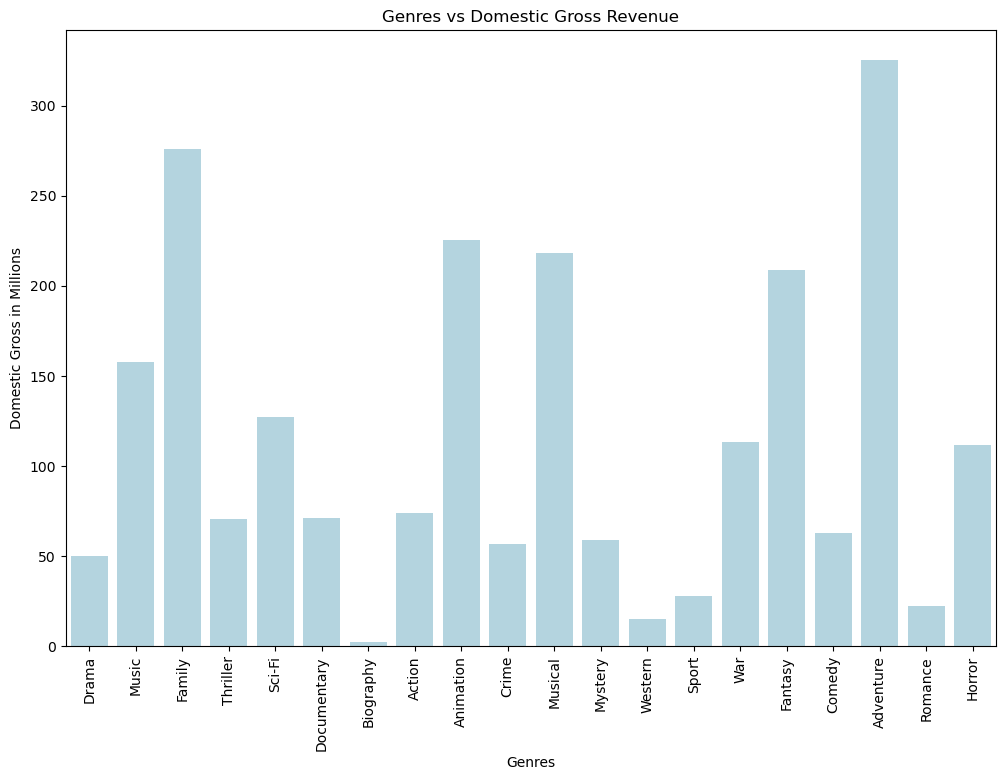

In [54]:
# Visualize Genre vs domestic_gross

plt.subplots(figsize = (12,8))
sns.barplot(x = 'genres', y ='wordlwide_gross_million', data=tn_movies_moviebasics, color='lightblue', order = unique_genrelist1, ci=None)

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Worldwide Gross in Millions')
plt.xticks(rotation = 90)
plt.title('Genres vs Worldwide Gross Revenue')

# Show the plot
plt.show()

Above visualization shows Genre Animation, Adventure, Family and Fantasy has best domestic gross revenue. Again same genres
makes good revenue worldwide, obviously worldwide revenue is 2-3 times larger than domestic revenue. Distributing worldwide will increase
the revenue for Adventure, Action and Sci-fi movies.

In [52]:
# Saving dataframe to csv for Tableau visualization
tn_movies_moviebasics.to_csv("C:/Users/uyamu/Documents/Phase2/tnmovies_moviebasics.csv")


Finally, we want to see what day of the week works best for movie release and earn the best revenue. Using tmdb_movies dataset, and visualizing 
Popularity vs Day of the week.

<function matplotlib.pyplot.show(close=None, block=None)>

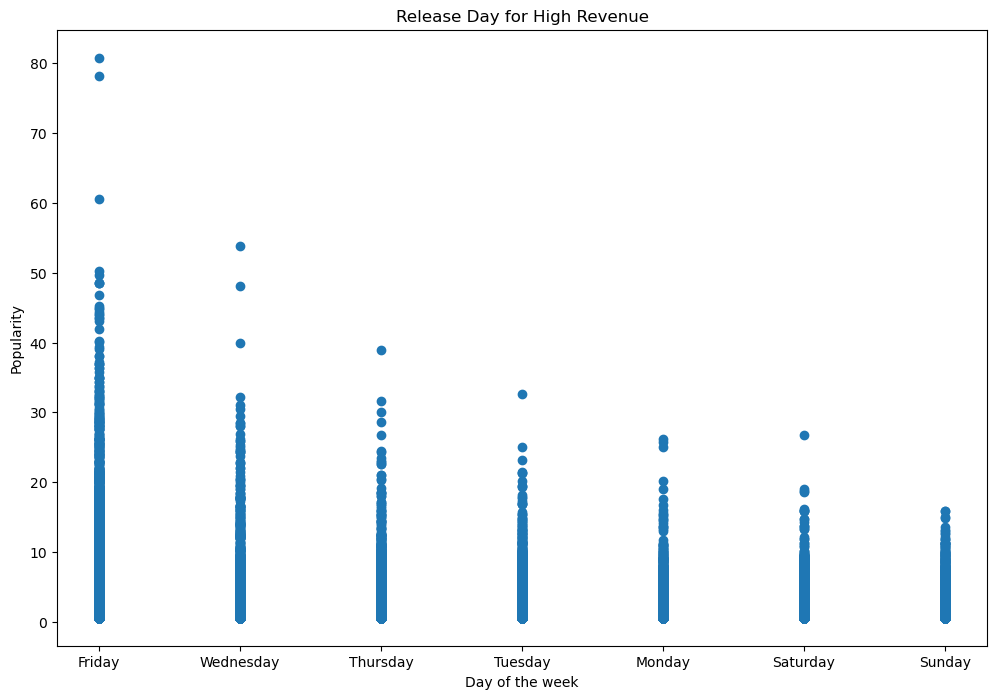

In [53]:
# Visualize popularity vs release_date
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(data=tmdb_movies1, x= 'release_day' , y="popularity")

# title, x & y labels
plt.title('Release Day for High Revenue')
plt.xlabel('Day of the week')
plt.ylabel('Popularity')
plt.show

Above visualization shows Friday would the best day to release movies which yields higher revenue.